In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
data = [
    [1, 150],
    [2, 200],
    [3, 250],
    [4, 300],
    [5, 350]
]

In [ ]:
X = torch.tensor([[d[0]] for d in data], dtype=torch.float32).to(device)
y = torch.tensor([[d[1]] for d in data], dtype=torch.float32).to(device)

In [ ]:
X.shape, y.shape

(torch.Size([5, 1]), torch.Size([5, 1]))

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegression().to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model.train()
num_epochs = 1000
for epoch in range(num_epochs):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.2f}")

Epoch 50, Loss: 819.70
Epoch 100, Loss: 584.22
Epoch 150, Loss: 416.38
Epoch 200, Loss: 296.76
Epoch 250, Loss: 211.51
Epoch 300, Loss: 150.75
Epoch 350, Loss: 107.44
Epoch 400, Loss: 76.57
Epoch 450, Loss: 54.58
Epoch 500, Loss: 38.90
Epoch 550, Loss: 27.72
Epoch 600, Loss: 19.76
Epoch 650, Loss: 14.08
Epoch 700, Loss: 10.04
Epoch 750, Loss: 7.15
Epoch 800, Loss: 5.10
Epoch 850, Loss: 3.63
Epoch 900, Loss: 2.59
Epoch 950, Loss: 1.85
Epoch 1000, Loss: 1.32


In [ ]:
a = model.linear.weight.item()
b = model.linear.bias.item()
print(f"Weight: {a:.2f} & Bias: {b:.2f}")

Weight: 50.74 & Bias: 97.32


In [ ]:
model.eval()
num_rooms_test = torch.tensor([[3.5]]).to(device)
predicted_price = model(num_rooms_test).item()
print(f"Predicted price for {num_rooms_test.item()} rooms: ${predicted_price:.2f}k")

Predicted price for 3.5 rooms: $274.92k


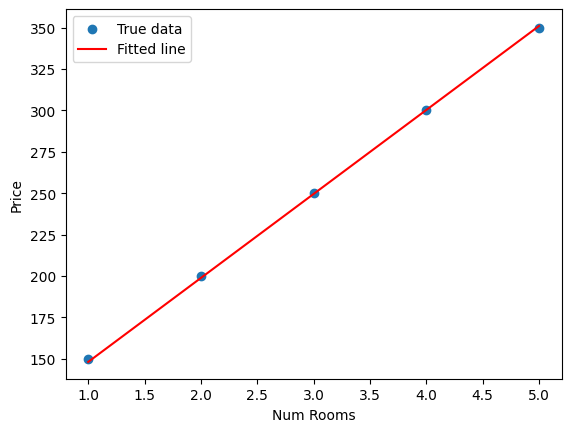

In [ ]:
model.eval()
with torch.no_grad():
    predicted = model(X).cpu().numpy()
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='True data')
plt.plot(X.cpu().numpy(), predicted, 'r-', label='Fitted line')
plt.xlabel('Num Rooms')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data = [
    [2.5, 3.1, 0],
    [1.3, 3.0, 0],
    [3.3, 4.0, 1],
    [5.0, 2.0, 1],
    [3.6, 3.7, 1],
    [1.2, 1.9, 0]
]

In [ ]:
X = torch.tensor([d[:2] for d in data], dtype=torch.float32).to(device)
y = torch.tensor([d[2] for d in data], dtype=torch.float32).unsqueeze(1).to(device)

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(2,1)

    def forward(self, x):
        logits = self.linear(x)
        probs = torch.sigmoid(logits)
        return probs

In [ ]:
model = LogisticRegression().to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model.train()
num_epochs = 1000
for epoch in range(num_epochs):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%50 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

epoch: 50, loss: 0.8204
epoch: 100, loss: 0.7455
epoch: 150, loss: 0.6889
epoch: 200, loss: 0.6445
epoch: 250, loss: 0.6090
epoch: 300, loss: 0.5801
epoch: 350, loss: 0.5560
epoch: 400, loss: 0.5356
epoch: 450, loss: 0.5180
epoch: 500, loss: 0.5025
epoch: 550, loss: 0.4888
epoch: 600, loss: 0.4764
epoch: 650, loss: 0.4653
epoch: 700, loss: 0.4550
epoch: 750, loss: 0.4456
epoch: 800, loss: 0.4369
epoch: 850, loss: 0.4288
epoch: 900, loss: 0.4212
epoch: 950, loss: 0.4141
epoch: 1000, loss: 0.4074


In [ ]:
a = model.linear.weight[0]
b = model.linear.bias.item()
print(f'Weights: {a}, bias: {b}')

Weights: tensor([ 1.1264, -0.7794], device='cuda:0', grad_fn=<SelectBackward0>), bias: -0.295258104801178


In [ ]:
model.eval()
with torch.no_grad():
    test_sample = torch.tensor([[3.0, 3.5]]).to(device)
    predicted_prob = model(test_sample).item()
    predicted_class = 1 if predicted_prob >= 0.5 else 0
    print(f"Predicted probability: {predicted_prob:.4f}")
    print(f"Predicted class: {predicted_class}")

Predicted probability: 0.5881
Predicted class: 1


In [ ]:
data = [
    [2, 10, 850, 200],
    [3, 5, 900, 300],
    [4, 20, 1200, 250],
    [5, 15, 1500, 400],
    [3, 7, 1000, 280],
    [4, 12, 1300, 350],
]

In [ ]:
class HouseDataset(Dataset):
    def __init__(self, data) -> None:
        self.X = torch.tensor([d[:3] for d in data], dtype=torch.float32).to(device)
        self.y = torch.tensor([d[3] for d in data], dtype=torch.float32).unsqueeze(1).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
dataset = HouseDataset(data)
loader = DataLoader(dataset, batch_size=3, shuffle=True)

In [ ]:
class HousePriceNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.fc1 = nn.Linear(3, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 5)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)

        return x

In [ ]:
model = HousePriceNN().to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for name, param in model.state_dict().items():
    print(f'{name}: {param}')

fc1.weight: tensor([[ 0.1173, -0.1260, -0.2084],
        [-0.5194,  0.3209,  0.5319],
        [ 0.1766,  0.1128, -0.2760],
        [-0.5083,  0.3656, -0.4020],
        [-0.2497,  0.0408, -0.2287],
        [ 0.3267, -0.4991,  0.0274],
        [ 0.0123,  0.0434, -0.2162],
        [ 0.3392, -0.3757, -0.1746],
        [ 0.2957, -0.4825, -0.0376],
        [-0.1312, -0.1218, -0.2404]], device='cuda:0')
fc1.bias: tensor([-0.2465, -0.1363, -0.1673, -0.1145,  0.1353,  0.3722, -0.5472, -0.4479,
        -0.2939, -0.1636], device='cuda:0')
fc2.weight: tensor([[-0.0780, -0.2624, -0.0365, -0.1763, -0.1048, -0.1629, -0.2557,  0.2790,
         -0.1230,  0.1537],
        [ 0.1228, -0.2109, -0.1251, -0.0471,  0.2800,  0.0165,  0.1161, -0.2631,
          0.2344, -0.1037],
        [ 0.1958, -0.1701,  0.0889,  0.2125, -0.1953, -0.2248,  0.1603,  0.1299,
         -0.2442,  0.2461],
        [-0.2716, -0.0222, -0.0110,  0.1933,  0.0522, -0.1844,  0.2716,  0.1821,
          0.1343, -0.1131],
        [-0.2971, 

In [ ]:
model.train()
num_epochs = 1000
for epoch in range(num_epochs):
    for features, target in loader:
        pred = model(features)
        loss = criterion(pred, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1)%50==0:
        print(f'Epoch: {epoch+1}, loss: {loss.item():.4f}')

Epoch: 50, loss: 7530.4878
Epoch: 100, loss: 7349.6357
Epoch: 150, loss: 7633.9404
Epoch: 200, loss: 4152.9033
Epoch: 250, loss: 4524.8174
Epoch: 300, loss: 821.5324
Epoch: 350, loss: 3659.1377
Epoch: 400, loss: 1046.5515
Epoch: 450, loss: 6766.6318
Epoch: 500, loss: 4787.5215
Epoch: 550, loss: 4067.1924
Epoch: 600, loss: 4594.9795
Epoch: 650, loss: 823.6831
Epoch: 700, loss: 4618.2397
Epoch: 750, loss: 1766.7598
Epoch: 800, loss: 1765.9773
Epoch: 850, loss: 4158.8237
Epoch: 900, loss: 3216.1443
Epoch: 950, loss: 1677.9856
Epoch: 1000, loss: 4512.9033


In [ ]:
for name, param in model.state_dict().items():
    print(f'{name}: {param}')

fc1.weight: tensor([[ 0.1173, -0.1260, -0.2084],
        [-0.5194,  0.3209,  0.5319],
        [ 0.1766,  0.1128, -0.2760],
        [-0.5083,  0.3656, -0.4020],
        [-0.2497,  0.0408, -0.2287],
        [ 0.3267, -0.4991,  0.0274],
        [ 0.0123,  0.0434, -0.2162],
        [ 0.3392, -0.3757, -0.1746],
        [ 0.2957, -0.4825, -0.0376],
        [-0.1312, -0.1218, -0.2404]], device='cuda:0')
fc1.bias: tensor([-0.2465, -0.1363, -0.1673, -0.1145,  0.1353,  0.3722, -0.5472, -0.4479,
        -0.2939, -0.1636], device='cuda:0')
fc2.weight: tensor([[-0.0780, -0.2624, -0.0365, -0.1763, -0.1048, -0.1629, -0.2557,  0.2790,
         -0.1230,  0.1537],
        [ 0.1228, -0.2109, -0.1251, -0.0471,  0.2800,  0.0165,  0.1161, -0.2631,
          0.2344, -0.1037],
        [ 0.1958, -0.1701,  0.0889,  0.2125, -0.1953, -0.2248,  0.1603,  0.1299,
         -0.2442,  0.2461],
        [-0.2716, -0.0222, -0.0110,  0.1933,  0.0522, -0.1844,  0.2716,  0.1821,
          0.1343, -0.1131],
        [-0.2971, 

In [ ]:
model.eval()
test_sample = torch.tensor([[3, 5, 900]], dtype=torch.float32).to(device)
predicted_price = model(test_sample).item()
print(f"Predicted price for {test_sample.tolist()[0]}: ${predicted_price:.2f}k")

Predicted price for [3.0, 5.0, 900.0]: $296.65k


# Task
Provide an example of an autoencoder in PyTorch, including data generation, model definition, training, and visualization of results.

## Generate data

### Subtask:
Create some simple data, for example, a set of 2D points that lie on a curve or line.


**Reasoning**:
Generate synthetic data following a sine wave and add noise, then convert it to a PyTorch tensor and move it to the appropriate device.



In [ ]:
import numpy as np

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)

data = torch.tensor(np.vstack((x, y)).T, dtype=torch.float32).to(device)
print(data.shape)

torch.Size([100, 2])


## Define autoencoder model

### Subtask:
Create a PyTorch `nn.Module` for the autoencoder, consisting of an encoder and a decoder.


**Reasoning**:
Define the Autoencoder class with encoder and decoder layers as specified in the instructions.



In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 5),
            nn.ReLU(),
            nn.Linear(5, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 5),
            nn.ReLU(),
            nn.Linear(5, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = data.shape[1]
latent_dim = 1
model = Autoencoder(input_dim, latent_dim).to(device)
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=2, bias=True)
  )
)


## Define loss and optimizer

### Subtask:
Define the loss function (e.g., MSELoss) and an optimizer (e.g., Adam).


**Reasoning**:
Define the loss function and optimizer for the autoencoder model.



In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(criterion)
print(optimizer)

MSELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Train autoencoder

### Subtask:
Write a training loop to train the autoencoder on the generated data.


**Reasoning**:
Implement the training loop for the autoencoder model as per the instructions.



In [ ]:
model.train()
num_epochs = 2000  # Increased epochs for better training
for epoch in range(num_epochs):
    # Forward pass
    decoded = model(data)
    # Calculate loss
    loss = criterion(decoded, data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/2000], Loss: 6.7521
Epoch [200/2000], Loss: 4.6228
Epoch [300/2000], Loss: 2.5936
Epoch [400/2000], Loss: 0.6112
Epoch [500/2000], Loss: 0.2551
Epoch [600/2000], Loss: 0.2312
Epoch [700/2000], Loss: 0.2175
Epoch [800/2000], Loss: 0.2058
Epoch [900/2000], Loss: 0.1935
Epoch [1000/2000], Loss: 0.1805
Epoch [1100/2000], Loss: 0.1671
Epoch [1200/2000], Loss: 0.1544
Epoch [1300/2000], Loss: 0.1429
Epoch [1400/2000], Loss: 0.1330
Epoch [1500/2000], Loss: 0.1242
Epoch [1600/2000], Loss: 0.1164
Epoch [1700/2000], Loss: 0.1096
Epoch [1800/2000], Loss: 0.1037
Epoch [1900/2000], Loss: 0.0986
Epoch [2000/2000], Loss: 0.0941


## Visualize results

### Subtask:
Visualize the original data and the reconstructed data from the autoencoder to see how well it performs.


**Reasoning**:
Visualize the original and reconstructed data using matplotlib scatter plots.



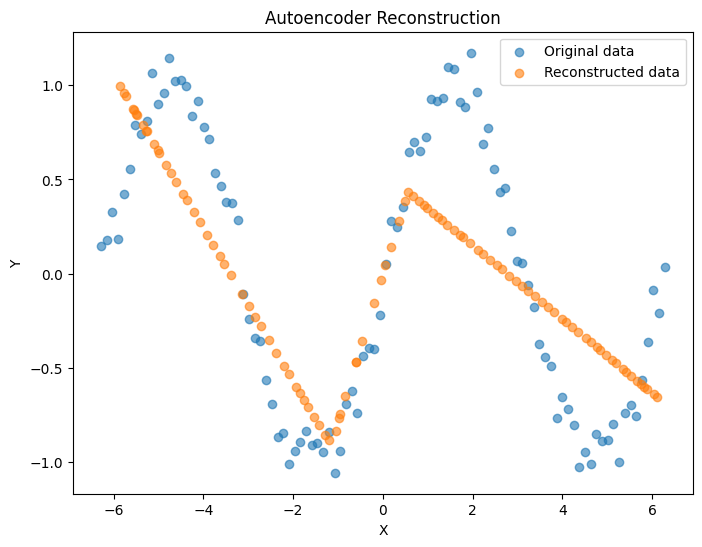

In [ ]:
model.eval()
with torch.no_grad():
    decoded = model(data)

original_data_np = data.cpu().numpy()
decoded_data_np = decoded.cpu().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(original_data_np[:, 0], original_data_np[:, 1], label='Original data', alpha=0.6)
plt.scatter(decoded_data_np[:, 0], decoded_data_np[:, 1], label='Reconstructed data', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Autoencoder Reconstruction')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A 2D dataset of 100 points following a noisy sine wave was generated.
*   An autoencoder model with a 2-dimensional input layer, a hidden layer of size 5, and a 1-dimensional latent space was defined.
*   The Mean Squared Error (MSE) was used as the loss function and the Adam optimizer with a learning rate of 0.001 was used for training.
*   The model was trained for 2000 epochs, resulting in a significant decrease in the loss from approximately 6.7521 to 0.0941.
*   Visualization of the original and reconstructed data shows that the autoencoder is able to reconstruct the general shape of the sine wave.

### Insights or Next Steps

*   The autoencoder successfully learned to reconstruct the 2D data points, suggesting the 1D latent space effectively captures the underlying structure of the noisy sine wave.
*   Further analysis could involve exploring the representation in the latent space or applying this autoencoder to anomaly detection tasks on similar sequential data.
